# The Sparks Foundation (GRIP, Data Science and Business Analytics)
## Task 2: Prediction using unsupervised ML

#### Problem Statement:
From the given 'iris' dataset, predict the optimum number of clusters and represent it visually

#### Dataset used:
'https://bit.ly/3kXTdox' (Iris dataset)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('iris.csv')
data=data[data.columns[1:]]
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


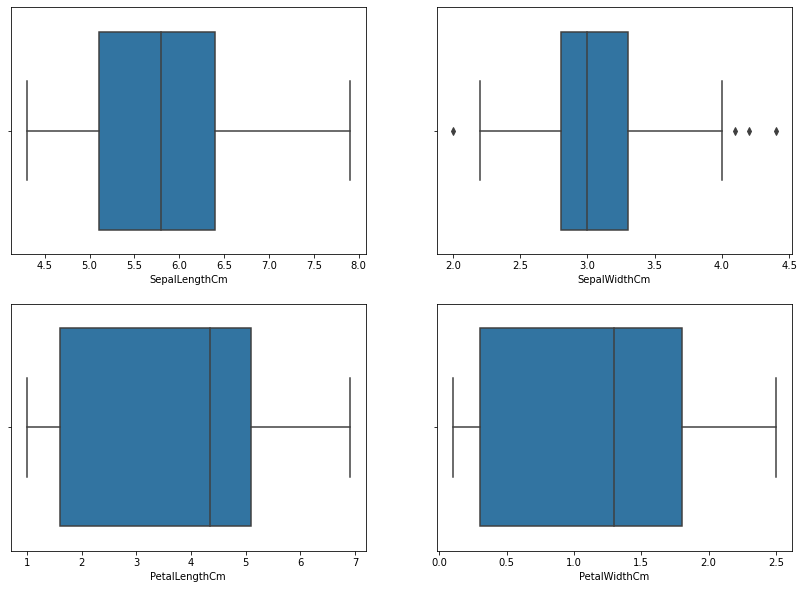

In [5]:
plt.figure(figsize=(14,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=data[data.columns[i]])
plt.show()

#### In the plots we can see that the column 'SepalWidthCm' has got some outliers

/var/folders/6w/3bdj6gnx0tg0ryg6t_ykcx9r0000gn/T/ipykernel_3126/2303110768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_col[i]=u_lim
/var/folders/6w/3bdj6gnx0tg0ryg6t_ykcx9r0000gn/T/ipykernel_3126/2303110768.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_col[i]=l_lim


<AxesSubplot:xlabel='SepalWidthCm'>

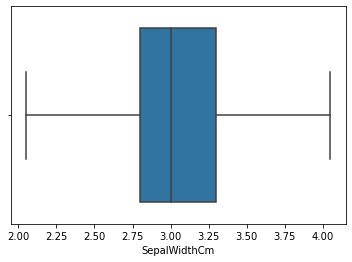

In [6]:
out_col=data['SepalWidthCm']
q1=np.percentile(out_col,25)
q3=np.percentile(out_col,75)
iqrange=q3-q1
l_lim=q1-(1.5*iqrange)
u_lim=q3+(1.5*iqrange)
for i in range(len(out_col)):
    if out_col[i]>u_lim:
        out_col[i]=u_lim
    elif out_col[i]<l_lim:
        out_col[i]=l_lim
sns.boxplot(x=data['SepalWidthCm'])

In [7]:
x = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:, 4].values

## Finding the optimum number of clusters

####  For finding the minimum clusters, the elbow method can be used which runs k-means clustering on the dataset and then for each value of k computes an average score for all clusters.

In [8]:
wcss=[] #here the sum of squared distance between each point and the centroid in a cluster is stored
for i in range(1, 11):
    kmean = KMeans(n_clusters = i)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

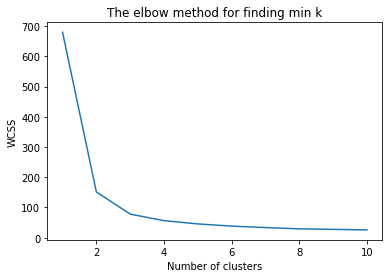

In [9]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method for finding min k')
plt.show()

#### As in the diagram, we can choose that the minimum number of clusters are 3

## Visualisation

In [10]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 0)
y_pred=kmeans.fit_predict(x)

In [11]:
kmeans.cluster_centers_

array([[5.9016129 , 2.74919355, 4.39354839, 1.43387097],
       [5.006     , 3.407     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

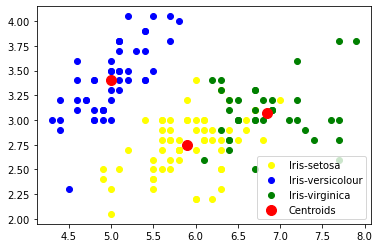

In [31]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

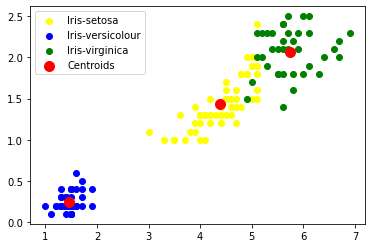

In [32]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()